In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NeuralNetworks/nature_crop.zip", "r")
zip_ref.extractall("/content/nature")
zip_ref.close()

In [ ]:
batch_size=256
image_size=(100, 100)

In [ ]:
train_dataset = image_dataset_from_directory('nature/nature/seg_train/seg_train',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4222 files belonging to 4 classes.
Using 3800 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory('nature/nature/seg_train/seg_train',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4222 files belonging to 4 classes.
Using 422 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

['buildings', 'forest', 'mountain', 'sea']

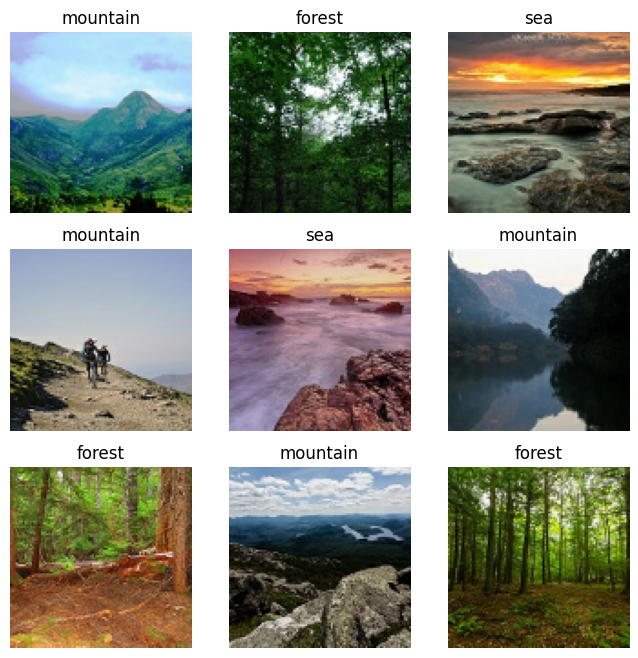

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
test_dataset = image_dataset_from_directory('nature/nature/seg_test/seg_test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 1946 files belonging to 4 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(96, (11, 11), padding='same',
                 input_shape=(100, 100, 3), activation='relu'))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D())
# Сверточный слой
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D())
# Сверточный слой
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D())
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='relu'))
# Выходной слой, 4 нейрона по количеству классов
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=14,
                    verbose=2)

Epoch 1/14
15/15 - 233s - loss: 1601.7876 - accuracy: 0.2376 - val_loss: 1.3815 - val_accuracy: 0.2393 - 233s/epoch - 16s/step
Epoch 2/14
15/15 - 31s - loss: 3.1646 - accuracy: 0.2800 - val_loss: 1.7870 - val_accuracy: 0.2393 - 31s/epoch - 2s/step
Epoch 3/14
15/15 - 30s - loss: 2.3248 - accuracy: 0.2461 - val_loss: 2.2044 - val_accuracy: 0.2654 - 30s/epoch - 2s/step
Epoch 4/14
15/15 - 31s - loss: 1.9619 - accuracy: 0.2647 - val_loss: 1.4416 - val_accuracy: 0.2512 - 31s/epoch - 2s/step
Epoch 5/14
15/15 - 31s - loss: 1.3809 - accuracy: 0.3018 - val_loss: 1.3413 - val_accuracy: 0.3152 - 31s/epoch - 2s/step
Epoch 6/14
15/15 - 32s - loss: 1.3312 - accuracy: 0.3379 - val_loss: 1.3242 - val_accuracy: 0.3033 - 32s/epoch - 2s/step
Epoch 7/14
15/15 - 32s - loss: 1.2965 - accuracy: 0.3634 - val_loss: 1.3091 - val_accuracy: 0.3223 - 32s/epoch - 2s/step
Epoch 8/14
15/15 - 31s - loss: 1.2644 - accuracy: 0.4003 - val_loss: 1.2290 - val_accuracy: 0.4265 - 31s/epoch - 2s/step
Epoch 9/14
15/15 - 31s - l

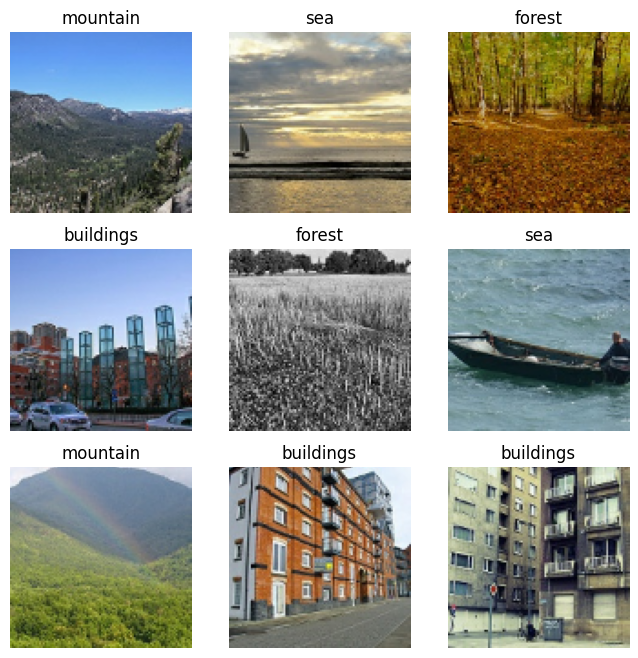

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

8/8 [==============================] - 22s 3s/step - loss: 0.6841 - accuracy: 0.7112


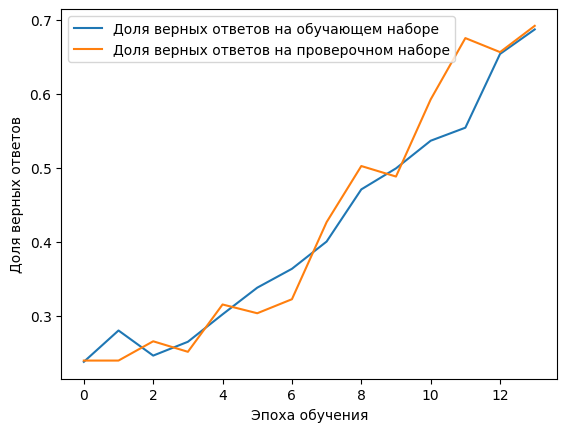

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

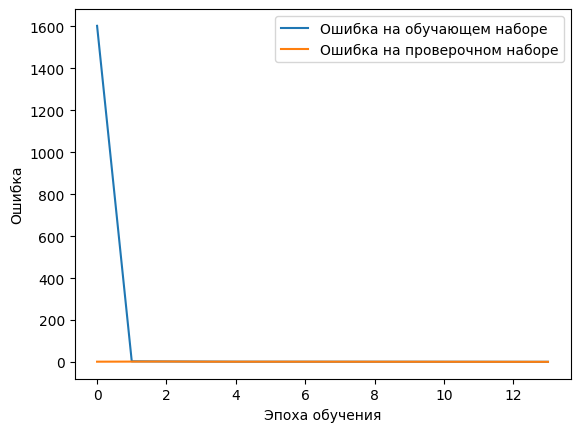

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()